## Data  개요

**소상공인시장진흥공단_상가(상권)정보**

- 영업 중인 전국 상가업소 데이터를 제공
- (상호명, 업종코드, 업종명, 지번주소, 도로명주소, 경도, 위도 등)

- 공공 데이터 포털 
https://www.data.go.kr/data/15083033/fileData.do

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)
pd.options.display.max_columns = 39

## Step 1: 질문하기 (Ask questions)
데이터가 주어진 상태에서 질문을 할 수도 있고, 질문에 답할 수 있는 데이터를 수집할 수도 있다.

**예시**

- (1) 서초구에는 어떤 음식점 업종이 많을까?
- (2) 구별 음식점 업종 분포는 어떻게 다를까?
- (3) 어느 구에 학원수가 많을까?
- (4) 구별 학원 분포는 어떻게 다를까?
- (5) 관심 동네 비교해보기

## Step 2: 데이터 랭글링 (Wrangle data)
- 데이터 랭글링 : 원자료(raw data)를 보다 쉽게 접근하고 분석할 수 있도록 데이터를 정리하고 통합하는 과정
(참고. 위키피디아)
- 세부적으로는 데이터의 수집(gather), 평가(assess), 정제(clean) 작업으로 나눌 수 있다.

### 2.1 수집(gather)

In [6]:
df=pd.read_csv('C:/Users/user/Desktop/새 폴더/소상공인시장진흥공단_상가(상권)정보_서울_202209.csv',sep=',')

In [7]:
df.head().T

,0,1,2,3,4
상가업소번호,23324279,24525909,24715368,15554136,17174175
상호명,제중건강원,민속악기사,태평양진주,김선희꼼꼼국어교습소,비지트
지점명,NaN,NaN,NaN,NaN,NaN
상권업종대분류코드,D,D,D,R,Q
상권업종대분류명,소매,소매,소매,학문/교육,음식
상권업종중분류코드,D10,D04,D26,R01,Q01
상권업종중분류명,건강/미용식품,취미/오락관련소매,시계/귀금속소매,학원-보습교습입시,한식
상권업종소분류코드,D10A07,D04A09,D26A01,R01A01,Q01A01
상권업종소분류명,건강원,악기판매,시계/귀금속,학원-입시,한식/백반/한정식
표준산업분류코드,G47216,G47593,G47830,P85501,I56111


### 2.2 평가(assess)

**샘플의 개수**, **컬럼의 개수**

In [9]:
df.shape

(361490, 39)

**인덱스 정보 보기**

In [12]:
df.index

RangeIndex(start=0, stop=361490, step=1)

**컬럼 정보 보기**

In [17]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

**요약 정보 보기**

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361490 entries, 0 to 361489
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     361490 non-null  int64  
 1   상호명        361490 non-null  object 
 2   지점명        61624 non-null   object 
 3   상권업종대분류코드  361490 non-null  object 
 4   상권업종대분류명   361490 non-null  object 
 5   상권업종중분류코드  361490 non-null  object 
 6   상권업종중분류명   361490 non-null  object 
 7   상권업종소분류코드  361490 non-null  object 
 8   상권업종소분류명   361490 non-null  object 
 9   표준산업분류코드   336942 non-null  object 
 10  표준산업분류명    336942 non-null  object 
 11  시도코드       361490 non-null  int64  
 12  시도명        361490 non-null  object 
 13  시군구코드      361490 non-null  int64  
 14  시군구명       361490 non-null  object 
 15  행정동코드      361490 non-null  int64  
 16  행정동명       361490 non-null  object 
 17  법정동코드      361490 non-null  int64  
 18  법정동명       361490 non-null  object 
 19  지번코드       361490 non-n

**누락 데이터 확인**

In [21]:
null=df.isnull().sum()
null

상가업소번호            0
상호명               0
지점명          299866
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      24548
표준산업분류명       24548
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         74907
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        313201
건물관리번호            0
건물명          182393
도로명주소             0
구우편번호             0
신우편번호             0
동정보          320442
층정보          140405
호정보          361490
경도                0
위도                0
dtype: int64

<AxesSubplot:>

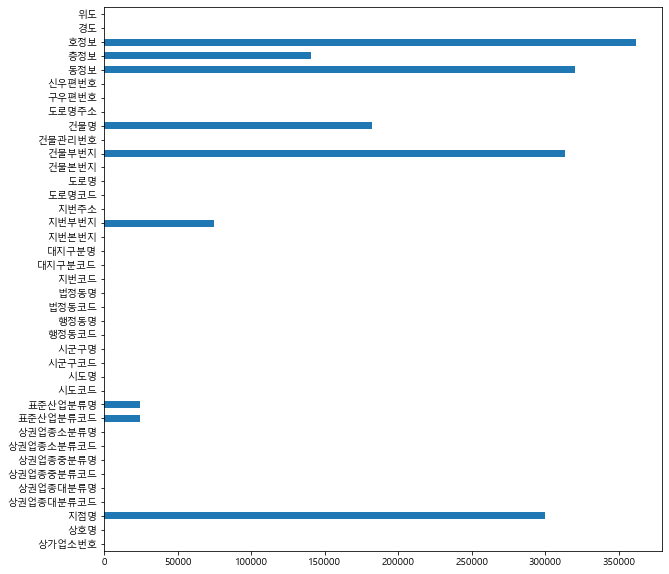

In [26]:
null.plot(kind='barh',figsize=(10,10))

<AxesSubplot:>

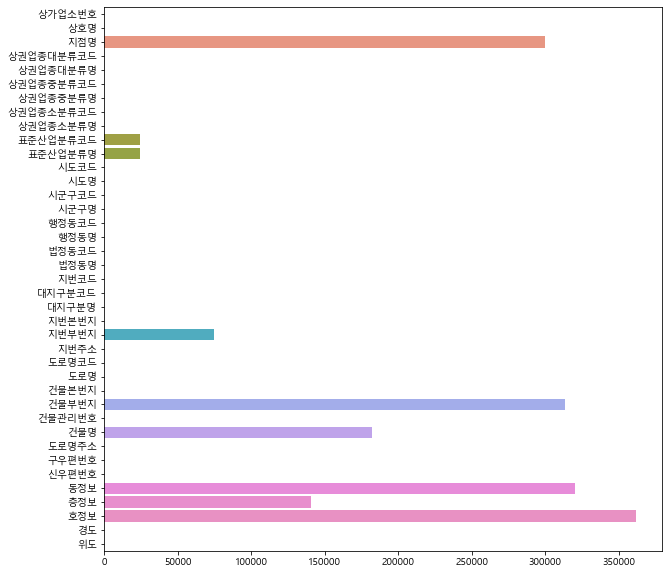

In [28]:
plt.figure(figsize=(10,10))
sns.barplot(y=null.index,x=null.values)

### 2.3 정제(clean)

**누락 데이터가 많은 컬럼 삭제**

In [33]:
notuse = null.sort_values(ascending=False).head(9)
notusea = notuse.index
notusea

Index(['호정보', '동정보', '건물부번지', '지점명', '건물명', '층정보', '지번부번지', '표준산업분류명',
       '표준산업분류코드'],
      dtype='object')

In [38]:
df=df.drop(notusea,axis=1)


KeyError: "['호정보', '동정보', '건물부번지', '지점명', '건물명', '층정보', '지번부번지', '표준산업분류명', '표준산업분류코드'] not found in axis"

In [41]:
df.isnull().sum()

상가업소번호       0
상호명          0
상권업종대분류코드    0
상권업종대분류명     0
상권업종중분류코드    0
상권업종중분류명     0
상권업종소분류코드    0
상권업종소분류명     0
시도코드         0
시도명          0
시군구코드        0
시군구명         0
행정동코드        0
행정동명         0
법정동코드        0
법정동명         0
지번코드         0
대지구분코드       0
대지구분명        0
지번본번지        0
지번주소         0
도로명코드        0
도로명          0
건물본번지        0
건물관리번호       0
도로명주소        0
구우편번호        0
신우편번호        0
경도           0
위도           0
dtype: int64

**컬럼명에 "코드" 또는 "번호"가 들어간 컬럼 삭제**

In [50]:
a=df.columns.str.contains('코드')
a

array([False, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False])

In [56]:
c=df.columns[a]
c

Index(['상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드', '행정동코드',
       '법정동코드', '지번코드', '대지구분코드', '도로명코드'],
      dtype='object')

In [51]:
b=df.columns.str.contains('번호')
b

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
        True, False, False])

In [57]:
d=df.columns[b]
d

Index(['상가업소번호', '건물관리번호', '구우편번호', '신우편번호'], dtype='object')

In [59]:
df=df.drop(c,axis=1)

In [60]:
df=df.drop(d,axis=1)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361490 entries, 0 to 361489
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       361490 non-null  object 
 1   상권업종대분류명  361490 non-null  object 
 2   상권업종중분류명  361490 non-null  object 
 3   상권업종소분류명  361490 non-null  object 
 4   시도명       361490 non-null  object 
 5   시군구명      361490 non-null  object 
 6   행정동명      361490 non-null  object 
 7   법정동명      361490 non-null  object 
 8   대지구분명     361490 non-null  object 
 9   지번본번지     361490 non-null  int64  
 10  지번주소      361490 non-null  object 
 11  도로명       361490 non-null  object 
 12  건물본번지     361490 non-null  int64  
 13  도로명주소     361490 non-null  object 
 14  경도        361490 non-null  float64
 15  위도        361490 non-null  float64
dtypes: float64(2), int64(2), object(12)
memory usage: 44.1+ MB


## Step 3: 데이터 탐색 (Exploratory Data Analysis)
데이터의 패턴을 찾고, 관계를 시각화 하는 작업 등으로 통해 데이터에 대한 직관을 극대화 한다.

**기술 통계 요약**

In [64]:
df.describe()

,지번본번지,건물본번지,경도,위도
count,361490.000000,361490.000000,361490.000000,361490.000000
mean,422.386384,139.732366,126.993759,37.544906
std,426.373510,259.077055,0.083937,0.049022
min,1.000000,1.000000,126.768169,37.434081
25%,102.000000,19.000000,126.922367,37.504588
50%,301.000000,46.000000,127.009557,37.542195
75%,644.000000,154.000000,127.056107,37.572518
max,9999.000000,3581.000000,127.182588,37.690787


In [65]:
df.describe(include='object')

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소
count,361490,361490,361490,361490,361490,361490,361490,361490,361490,361490,361490,361490
unique,263524,8,89,677,1,25,425,463,2,134165,12408,133359
top,CU,음식,한식,한식/백반/한정식,서울특별시,강남구,역삼1동,역삼동,대지,서울특별시 종로구 종로6가 262-1,서울특별시 종로구 종로,"서울특별시 종로구 종로 266, (종로6가)"
freq,1702,121534,39624,29155,361490,35511,6628,8292,361232,892,2263,898


### 3.1 히스토그램으로 수치 데이터의 분포 한눈에 확인하기
- **히스토그램(histogram)** : 수치형 데이터의 구간별 빈도수를 나타내는 그래프

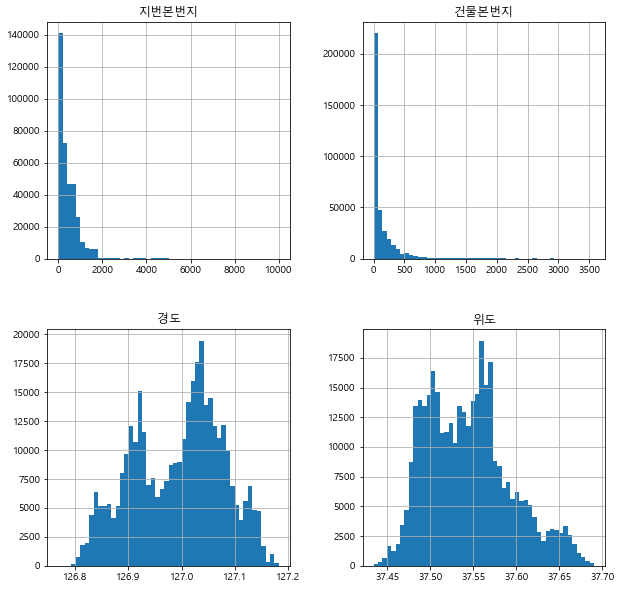

In [67]:
his = df.hist(figsize=(10,10),bins=50)


### 3.2 상관 계수로 두 변량간의 관계 파악하기

In [70]:
corr=df.corr()

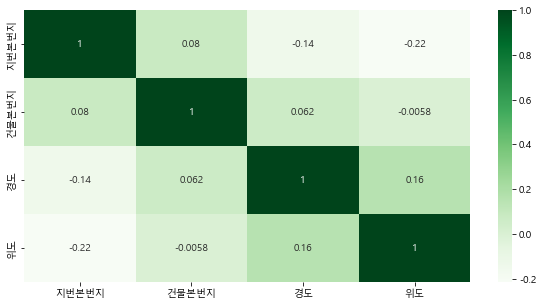

In [80]:
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap='Greens')
plt.show()

<AxesSubplot:xlabel='경도', ylabel='위도'>

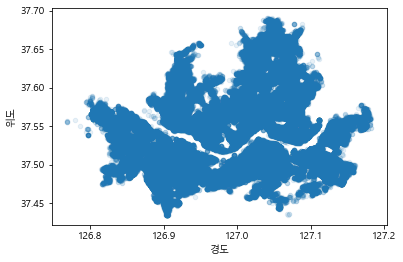

In [82]:
df.plot(kind='scatter',x='경도',y='위도',alpha=0.1)

* [컬러맵 정보](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

### 3.3 문자열 데이터에 대한 요약

- 상권업종대분류명 요약

In [84]:
df['상권업종대분류명'].describe()

count     361490
unique         8
top           음식
freq      121534
Name: 상권업종대분류명, dtype: object

- 상권업종대분류명 의 unique 값

In [86]:
df['상권업종대분류명'].unique()

array(['소매', '학문/교육', '음식', '부동산', '생활서비스', '관광/여가/오락', '숙박', '스포츠'],
      dtype=object)

- 상권업종대분류명 의 unique 값의 갯수

In [88]:
df['상권업종대분류명'].nunique()

8

- 상권업종대분류명 의 최빈값

In [90]:
df['상권업종대분류명'].mode()

0    음식
Name: 상권업종대분류명, dtype: object

- 상권업종대분류명 의 빈도수

In [95]:
df['시군구명'].value_counts()

강남구     35511
송파구     21663
서초구     21070
강서구     18242
마포구     17742
중구      16971
영등포구    15819
종로구     14791
강동구     14434
광진구     14057
구로구     13506
관악구     13240
동대문구    12918
은평구     12583
노원구     12444
양천구     12409
성북구     12280
중랑구     11548
용산구     11496
성동구     11139
금천구     10277
서대문구     9906
동작구      9891
강북구      9262
도봉구      8291
Name: 시군구명, dtype: int64

### 3.4 구별 음식점 업종 비교하기

#### (1) 서초구에는 어떤 음식점 업종이 많을까?

- 서초구에서 상권업종대분류명이 음식인 데이터만 가져오기

In [94]:
food = df[(df['시군구명']=='서초구')&(df['상권업종대분류명']=='음식')].copy()
food

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
4,비지트,음식,한식,한식/백반/한정식,서울특별시,서초구,방배4동,방배동,대지,854,서울특별시 서초구 방배동 854-18,서울특별시 서초구 동광로18길,82,"서울특별시 서초구 동광로18길 82, (방배동)",126.991394,37.488375
6,다향,음식,한식,한식/백반/한정식,서울특별시,서초구,서초3동,서초동,대지,1485,서울특별시 서초구 서초동 1485-3,서울특별시 서초구 효령로,230,"서울특별시 서초구 효령로 230, (서초동)",127.009382,37.483436
24,장수식당,음식,한식,한식/백반/한정식,서울특별시,서초구,잠원동,잠원동,대지,29,서울특별시 서초구 잠원동 29-3,서울특별시 서초구 강남대로95길,17,"서울특별시 서초구 강남대로95길 17, (잠원동)",127.018983,37.513638
32,북경깐풍기,음식,중식,중국음식/중국집,서울특별시,서초구,서초4동,서초동,대지,1307,서울특별시 서초구 서초동 1307-18,서울특별시 서초구 강남대로65길,7,"서울특별시 서초구 강남대로65길 7, (서초동)",127.025310,37.500247
60,라이브존레스토랑,음식,양식,패밀리레스토랑,서울특별시,서초구,반포4동,반포동,대지,83,서울특별시 서초구 반포동 83-16,서울특별시 서초구 동광로49길,7,"서울특별시 서초구 동광로49길 7, (반포동)",127.001978,37.493519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361185,마실,음식,유흥주점,꼬치구이전문점,서울특별시,서초구,반포1동,반포동,대지,705,서울특별시 서초구 반포동 705-7,서울특별시 서초구 신반포로,326,"서울특별시 서초구 신반포로 326-13, (반포동)",127.019767,37.509869
361258,커피앤와플타임,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,서초2동,서초동,대지,1360,서울특별시 서초구 서초동 1360-6,서울특별시 서초구 남부순환로347길,48,"서울특별시 서초구 남부순환로347길 48-7, (서초동)",127.031458,37.486619
361302,클립커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,반포1동,반포동,대지,705,서울특별시 서초구 반포동 705-7,서울특별시 서초구 신반포로,326,"서울특별시 서초구 신반포로 326-13, (반포동)",127.019767,37.509869
361304,서래셀부루,음식,유흥주점,룸살롱/단란주점,서울특별시,서초구,방배4동,방배동,대지,813,서울특별시 서초구 방배동 813-7,서울특별시 서초구 동광로,70,"서울특별시 서초구 동광로 70, (방배동)",126.990252,37.492591


<AxesSubplot:>

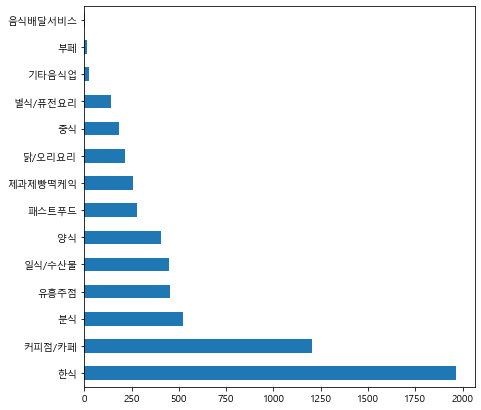

In [97]:
food['상권업종중분류명'].value_counts().plot(kind='barh',figsize=(7,7))

**분석결과** : 서포구에는 한식집이 제일 많다!!

#### (2) 구별 업종(상권업종중분류명 기준)  분포 비교하기

- 상권업종대분류명 이 음식인 데이터 준비

In [98]:
food1=df[(df['상권업종대분류명']=='음식')]
food1

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
4,비지트,음식,한식,한식/백반/한정식,서울특별시,서초구,방배4동,방배동,대지,854,서울특별시 서초구 방배동 854-18,서울특별시 서초구 동광로18길,82,"서울특별시 서초구 동광로18길 82, (방배동)",126.991394,37.488375
5,쓰리에프,음식,한식,한식/백반/한정식,서울특별시,동작구,사당2동,사당동,대지,139,서울특별시 동작구 사당동 139-72,서울특별시 동작구 동작대로27가길,12,"서울특별시 동작구 동작대로27가길 12, (사당동)",126.980952,37.487105
6,다향,음식,한식,한식/백반/한정식,서울특별시,서초구,서초3동,서초동,대지,1485,서울특별시 서초구 서초동 1485-3,서울특별시 서초구 효령로,230,"서울특별시 서초구 효령로 230, (서초동)",127.009382,37.483436
7,고향생막걸리,음식,유흥주점,민속주점,서울특별시,강남구,압구정동,신사동,대지,615,서울특별시 강남구 신사동 615-1,서울특별시 강남구 압구정로,216,"서울특별시 강남구 압구정로 216, (신사동)",127.031012,37.528073
12,도전최강달인왕만두,음식,한식,한식/백반/한정식,서울특별시,강동구,고덕2동,고덕동,대지,693,서울특별시 강동구 고덕동 693,서울특별시 강동구 고덕로,333,"서울특별시 강동구 고덕로 333, (고덕동, 고덕그라시움아파트)",127.159471,37.556197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361472,댄싱컵,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서대문구,남가좌2동,남가좌동,대지,390,서울특별시 서대문구 남가좌동 390,서울특별시 서대문구 거북골로,100,"서울특별시 서대문구 거북골로 100, (남가좌동, 래미안루센티아)",126.918228,37.575633
361480,플랫카페,음식,커피점/카페,커피전문점/카페/다방,서울특별시,광진구,구의1동,구의동,대지,635,서울특별시 광진구 구의동 635-2,서울특별시 광진구 자양로23길,73,"서울특별시 광진구 자양로23길 73, (구의동)",127.083681,37.543595
361483,산마을쌈밥집,음식,한식,한식/백반/한정식,서울특별시,은평구,불광2동,불광동,대지,157,서울특별시 은평구 불광동 157-1,서울특별시 은평구 불광로,181,"서울특별시 은평구 불광로 181, (불광동)",126.930927,37.622557
361484,달래해장종각점1호,음식,한식,해장국/감자탕,서울특별시,종로구,종로1.2.3.4가동,관철동,대지,18,서울특별시 종로구 관철동 18-3,서울특별시 종로구 우정국로2길,41,"서울특별시 종로구 우정국로2길 41, (관철동)",126.985375,37.569661


- 시군구명, 상권업종중분류명 으로 그룹화 해서 상점수 개수 구하기

In [101]:
foodgroup = food1.groupby(['시군구명','상권업종중분류명'])['상호명'].count()
foodgroup

시군구명  상권업종중분류명
강남구   기타음식업         49
      닭/오리요리       340
      별식/퓨전요리      224
      부페            47
      분식           751
                  ... 
중랑구   제과제빵떡케익      180
      중식            80
      커피점/카페       511
      패스트푸드        178
      한식          1247
Name: 상호명, Length: 348, dtype: int64

In [104]:
f = foodgroup.reset_index()
f = f.rename(columns={'상호명':'상호수'})
f

,시군구명,상권업종중분류명,상호수
0,강남구,기타음식업,49
1,강남구,닭/오리요리,340
2,강남구,별식/퓨전요리,224
3,강남구,부페,47
4,강남구,분식,751
...,...,...,...
343,중랑구,제과제빵떡케익,180
344,중랑구,중식,80
345,중랑구,커피점/카페,511
346,중랑구,패스트푸드,178


- 전체 업종별 평균 시각화하기

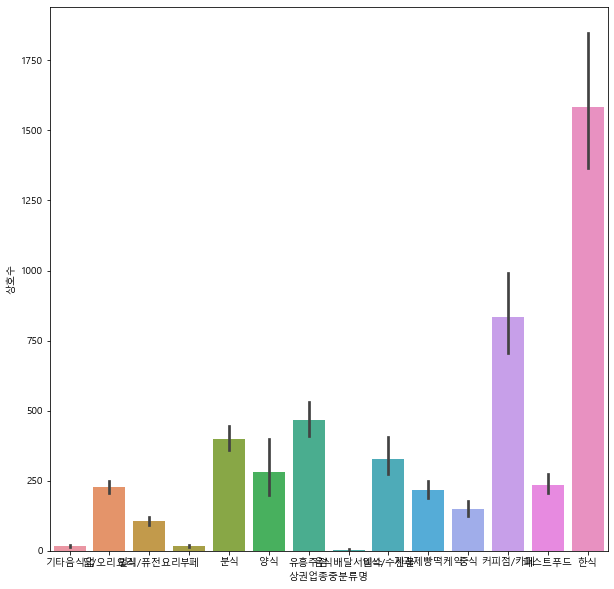

In [108]:
plt.figure(figsize=(10,10))
sns.barplot(data=f, x='상권업종중분류명',y='상호수')
plt.show()

- 상권업종중분류명에 따른 상호수를 시각화하되 시군구명별로 모두 표시 (sns.catplot 이용)

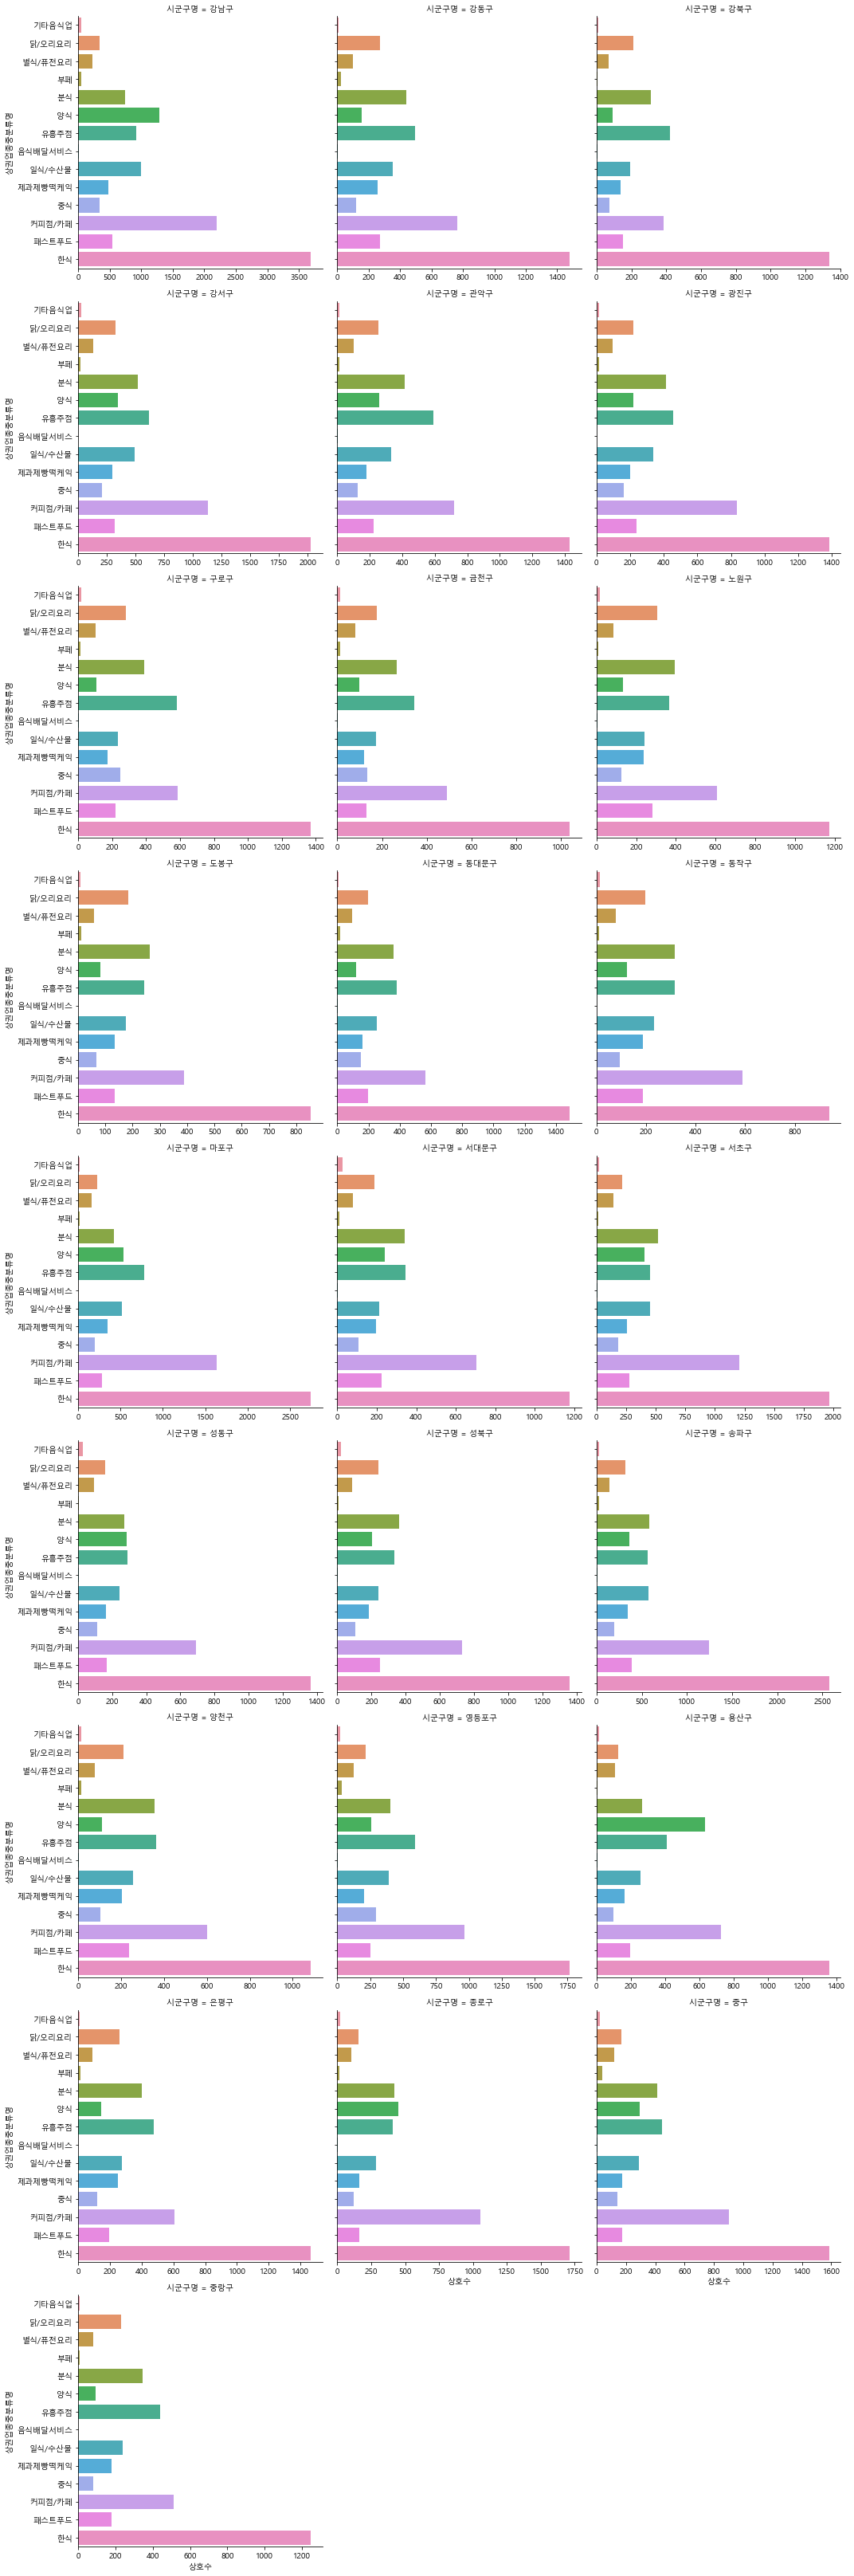

In [122]:
sns.catplot(data=f, y="상권업종중분류명", x="상호수",
            col='시군구명', kind='bar',col_wrap=3, sharex=False)

**분석결과** : 

### 3.5 구별 학원수 비교하기

#### (1) 어느 구에 학원수가 많을까?

- 상권업종대분류명의 unique 값

In [124]:
df['상권업종대분류명'].unique()

array(['소매', '학문/교육', '음식', '부동산', '생활서비스', '관광/여가/오락', '숙박', '스포츠'],
      dtype=object)

- 상권업종대분류명이 학문/교육인 데이터 가져오기

In [126]:
school = df[df['상권업종대분류명']=='학문/교육'].copy()
school

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
3,김선희꼼꼼국어교습소,학문/교육,학원-보습교습입시,학원-입시,서울특별시,송파구,방이1동,방이동,대지,197,서울특별시 송파구 방이동 197-3,서울특별시 송파구 위례성대로12길,31,"서울특별시 송파구 위례성대로12길 31, (방이동)",127.121520,37.510967
8,무비디자인,학문/교육,학원-창업취업취미,학원-디자인,서울특별시,마포구,대흥동,노고산동,대지,107,서울특별시 마포구 노고산동 107-17,서울특별시 마포구 백범로,8,"서울특별시 마포구 백범로 8, (노고산동)",126.936717,37.553996
18,힐리빙텔,학문/교육,도서관/독서실,독서실,서울특별시,서대문구,신촌동,대현동,대지,37,서울특별시 서대문구 대현동 37-69,서울특별시 서대문구 이화여대5길,28,"서울특별시 서대문구 이화여대5길 28, (대현동)",126.944057,37.558414
19,김샘수학교습소,학문/교육,학원-보습교습입시,학원-입시,서울특별시,중구,신당5동,신당동,대지,851,서울특별시 중구 신당동 851,서울특별시 중구 퇴계로90길,74,"서울특별시 중구 퇴계로90길 74, (신당동, 래미안하이베르아파트)",127.020965,37.560996
43,노바수학학원,학문/교육,학원-보습교습입시,학원-입시,서울특별시,강남구,일원2동,개포동,대지,12,서울특별시 강남구 개포동 12-4,서울특별시 강남구 개포로,615,"서울특별시 강남구 개포로 615, (개포동)",127.075573,37.492649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361396,발돋움국어,학문/교육,학원-어학,학원-외국어/어학,서울특별시,동대문구,휘경1동,휘경동,대지,183,서울특별시 동대문구 휘경동 183-128,서울특별시 동대문구 회기로29길,12,"서울특별시 동대문구 회기로29길 12, (휘경동)",127.058136,37.590654
361408,길동리드인독서논술교습소,학문/교육,학원기타,학원(종합),서울특별시,강동구,길동,길동,대지,125,서울특별시 강동구 길동 125-8,서울특별시 강동구 명일로,212,"서울특별시 강동구 명일로 212, (길동)",127.146159,37.537513
361414,공방순수,학문/교육,학원기타,학원-기타,서울특별시,관악구,은천동,봉천동,대지,1718,서울특별시 관악구 봉천동 1718,서울특별시 관악구 은천로,93,"서울특별시 관악구 은천로 93, (봉천동, 벽산블루밍아파트)",126.945884,37.487337
361467,수학교습소,학문/교육,학원-보습교습입시,학원-입시,서울특별시,강남구,대치4동,대치동,대지,931,서울특별시 강남구 대치동 931-1,서울특별시 강남구 삼성로67길,3,"서울특별시 강남구 삼성로67길 3, (대치동)",127.059093,37.501097


- 시군구명으로 빈도수 구하기

In [127]:
school['시군구명'].value_counts()

강남구     2586
송파구     1755
서초구     1699
양천구     1609
노원구     1495
강서구     1357
강동구     1341
은평구     1105
성북구     1102
마포구     1081
광진구     1059
관악구     1015
구로구     1010
동작구      998
영등포구     795
동대문구     779
중랑구      776
도봉구      759
서대문구     717
성동구      711
금천구      555
강북구      540
종로구      533
용산구      465
중구       351
Name: 시군구명, dtype: int64

- 빈도수 시각화하기

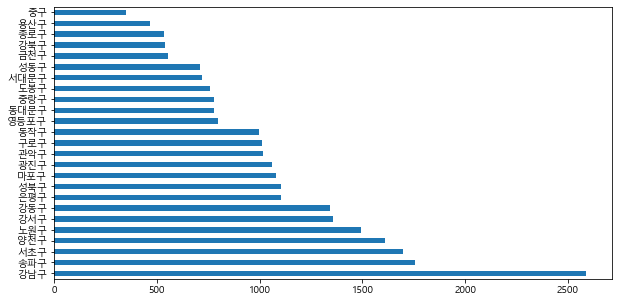

In [136]:
plt.figure(figsize=(10,5))
school['시군구명'].value_counts().plot(kind='barh')
plt.show()

**분석 결과** :

#### (2) 구별 학원의 세부 업종 (상권업종소분류명 기준) 분포 비교하기

- 상권업종소분류명으로 빈도수를 구하기

In [141]:
school['상권업종소분류명'].value_counts()

학원-입시        4858
학원-외국어/어학    3372
학원(종합)       3220
학원-기타        2606
어린이집         2429
             ... 
학원-텔렉스/통신       1
학원-용접기술         1
학원-국가고시         1
학원-도배           1
학원-레크리에이션       1
Name: 상권업종소분류명, Length: 100, dtype: int64

- 상권업종소분류명 빈도수 기준 상위 4개만 가져오기

In [145]:
top4=school['상권업종소분류명'].value_counts().head(4)
top4

학원-입시        4858
학원-외국어/어학    3372
학원(종합)       3220
학원-기타        2606
Name: 상권업종소분류명, dtype: int64

- 위에서 구한 상위 4개 업종으로만 데이터 가져오기

In [146]:
df_top4 =school[school["상권업종소분류명"].isin(top4.index)].copy()
df_top4.shape

(14056, 16)

- 상권업종소분류명, 시군구명으로 그룹화를 해서 빈도수 구하기

In [155]:
df_top4_group =df_top4.groupby(['상권업종소분류명','시군구명'])['상호명'].count()
df_top4_group

상권업종소분류명  시군구명
학원(종합)    강남구     292
          강동구     148
          강북구      78
          강서구     187
          관악구      89
                 ... 
학원-입시     용산구      55
          은평구     223
          종로구      58
          중구       45
          중랑구     127
Name: 상호명, Length: 100, dtype: int64

In [158]:
academy = df_top4_group.reset_index()
academy = academy.rename(columns={"상호명":"상호수"})
academy

,상권업종소분류명,시군구명,상호수
0,학원(종합),강남구,292
1,학원(종합),강동구,148
2,학원(종합),강북구,78
3,학원(종합),강서구,187
4,학원(종합),관악구,89
...,...,...,...
95,학원-입시,용산구,55
96,학원-입시,은평구,223
97,학원-입시,종로구,58
98,학원-입시,중구,45


#### (3) 위치 정보 시각화하기

- 위에서 구한 데이터를 구별로 시각화

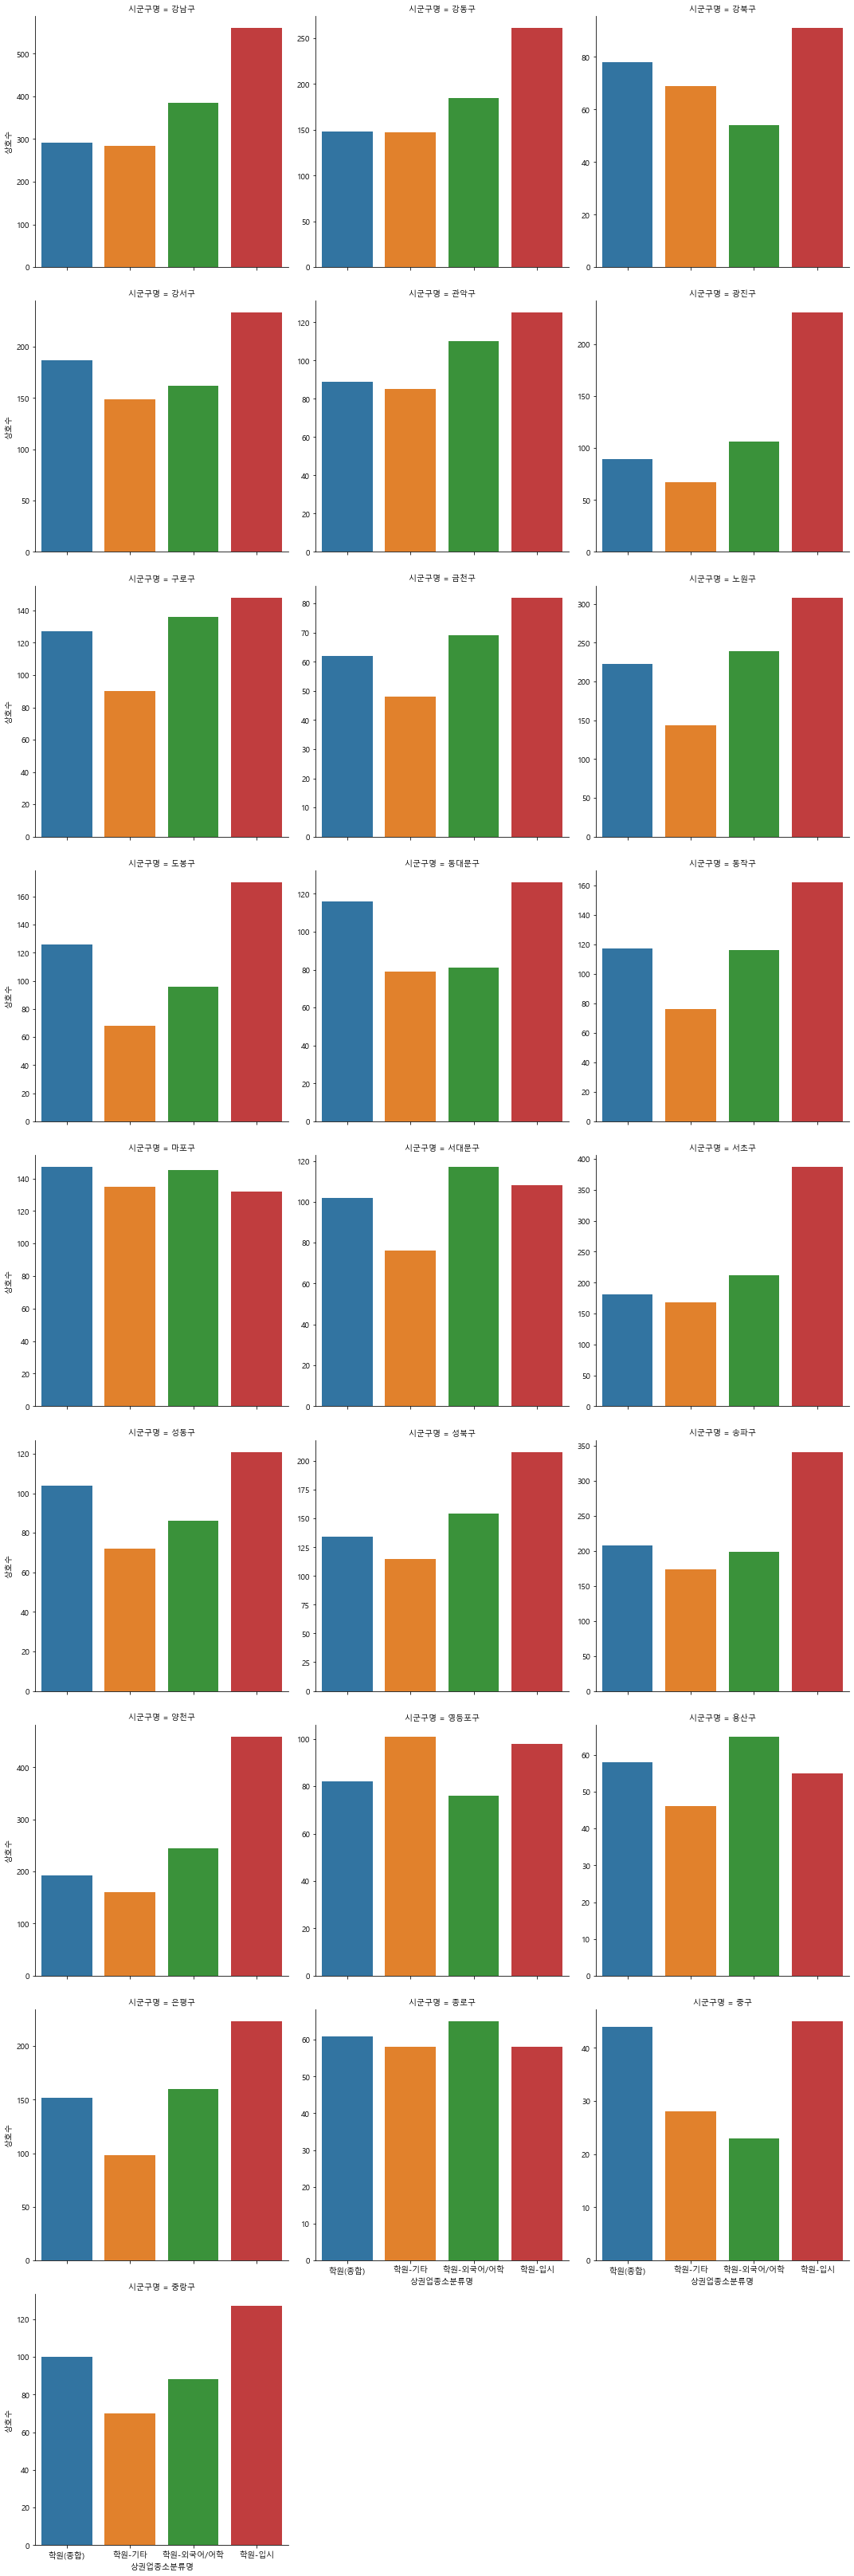

In [162]:
sns.catplot(data=academy,y='상호수',x='상권업종소분류명',col='시군구명',kind='bar',col_wrap=3,sharey=False)

- 학원-입시 업종만 시각화

<AxesSubplot:xlabel='경도', ylabel='위도'>

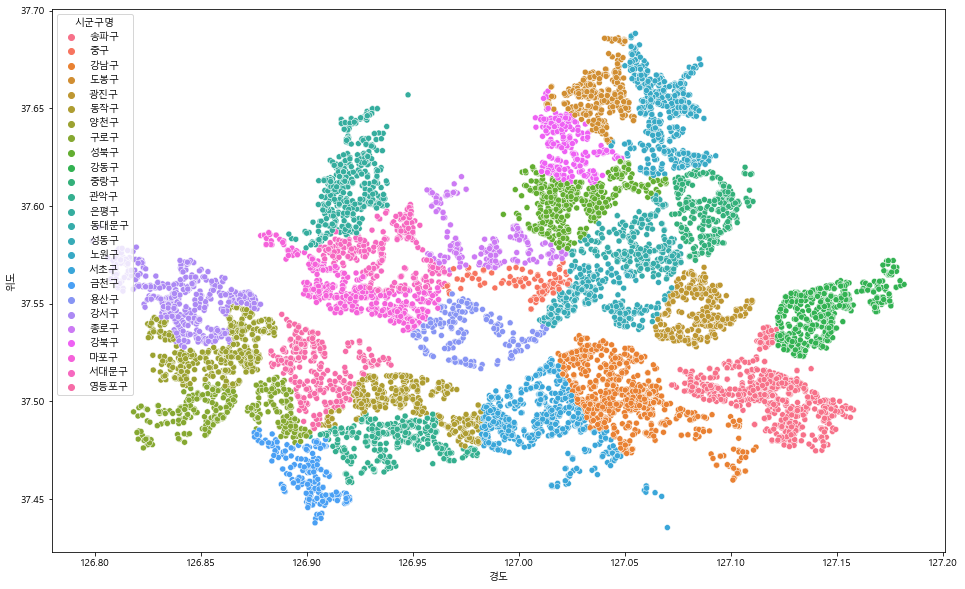

In [164]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data=df_top4, x="경도", y="위도", hue="시군구명")

- 강남구에 대해서만 시각화

<AxesSubplot:xlabel='경도', ylabel='위도'>

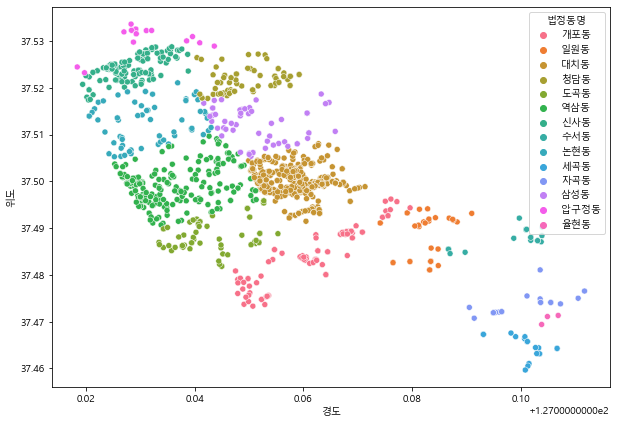

In [169]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_top4[df_top4["시군구명"] == "강남구"], 
                x="경도", y="위도", hue='법정동명')

- 관심 동네 비교해보기